In [6]:
#necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
import keras
from keras import layers
from keras import ops
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import datetime
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import PIL.Image
import matplotlib 
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import shutil
import posixpath
import sys 
import glob
#import wfdb
import pandas as pd
import math
from PIL import Image

In [7]:
#import keras
import tensorflow as tf
from tensorflow import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
from keras.models import Sequential
from sklearn.metrics import accuracy_score, f1_score

In [11]:
#pip install tensorflow

In [8]:
tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 10})

device_count {
  key: "CPU"
  value: 10
}
device_count {
  key: "GPU"
  value: 1
}

In [10]:
##Resize images to default pretrained tensor size: 224, 224, 3
def new_images(path):
    for image in os.listdir(path):
        print(image)
        name = os.path.basename(image)
        image = Image.open(path +'/' + image)
        resized_image = image.resize((224, 224))
        resized_image.save(path +'/' + name)

##extract images of separate channels from csv without transformation--data is already clean
def extract_images(source_path, destination_path, channel):
    for file in os.listdir(source_path):
        #open csv from the source_path
        df = pd.read_csv(source_path+'/'+file)
        #that channel values are converted to arrays to ease graphing
        graph = np.array(df[channel])
        #plot the channel points
        image = plt.plot(graph, label='Channel:'+ channel)
        #save the image in the destination
        plt.savefig(destination_path+'/'+file+'.png')
        #graph is reset and plot is closed to avoid overlap
        plt.close()
        graph = 0
        image = 0
        
    return 
##same as extract_images except with 2 channels at the same time to test reciprocity
def multi_extract_images(source_path, destination_path, channel1, channel2):
    for file in os.listdir(source_path):
        #open csv from the source_path
        df = pd.read_csv(source_path+'/'+file)
        #that channel values are converted to arrays to ease graphing
        graph1 = np.array(df[channel1])
        graph2 = np.array(df[channel2])
        #plot the channel points
        image = plt.plot(graph1, label='Channel:'+ channel1)
        image = plt.plot(graph2, label='Channel:'+ channel2)
        #save the image in the destination
        plt.savefig(destination_path+'/'+file+'.png')
        #graph is reset and plot is closed to avoid overlap
        plt.close()
        graph = 0
        image = 0
        
    return 

In [24]:
##aVF, V2+V1(on same graph per image), VX+VY(same graph per image)
##test reciprocations
#h_source = './ptb_resnet_rerun/second_arch/Healthy control'
#h_dest_v12 = './ptb_resnet_rerun/second_arch/v12'
#multi_extract_images(h_source, h_dest_v12, 'v1', 'v2')

#mi_source = './ptb_resnet_rerun/second_arch/Myocardial Infarction'
#mi_dest_v12 = './ptb_resnet_rerun/second_arch/v12'
#multi_extract_images(mi_source, mi_dest_v12, 'v1', 'v2')

#h_source = './ptb_resnet_rerun/second_arch/Healthy control
#h_dest_aVf = './ptb_resnet_rerun/second_arch/aVf
#extract_images(h_source, h_dest_aVf, 'avf')

In [23]:
#h_source = './ptb_resnet_rerun/second_arch/Healthy control'
#h_dest_ii = './ptb_resnet_rerun/second_arch/ii'
#h_dest_v6 = './ptb_resnet_rerun/second_arch/v6'
#h_dest_vz = './ptb_resnet_rerun/second_arch/vz'
#extract_images(h_source, h_dest_ii, 'ii')

In [24]:
#extract_images(h_source, h_dest_v6, 'v6')
#extract_images(h_source, h_dest_vz, 'vz')

In [25]:
#mi_source = './ptb_resnet_rerun/second_arch/Myocardial Infarction'
#mi_dest_ii = './ptb_resnet_rerun/second_arch/ii'
#mi_dest_v6 = './ptb_resnet_rerun/second_arch/v6'
#mi_dest_vz = './ptb_resnet_rerun/second_arch/vz'
#extract_images(mi_source, mi_dest_ii, 'ii')
#extract_images(mi_source, mi_dest_v6, 'v6')
#extract_images(mi_source, mi_dest_vz, 'vz')

In [12]:
#new_images('./ptb_resnet_rerun/second_arch/v12/Healthy control')
#new_images('./ptb_resnet_rerun/second_arch/v6/Healthy control')
#new_images('./ptb_resnet_rerun/second_arch/vz/Healthy control')
#new_images('./ptb_resnet_rerun/second_arch/v12/Myocardial Infarction')
#new_images('./ptb_resnet_rerun/second_arch/v6/Myocardial Infarction')
#new_images('./ptb_resnet_rerun/second_arch/vz/Myocardial Infarction')

In [ ]:
#%reset -f

In [5]:
#class_present = ['Bundle branch block','Cardiomyopathy','Dysrhythmia','Healthy control','Heart failure (NYHA 2)',
# 'Heart failure (NYHA 3)','Heart failure (NYHA 4)','Hypertrophy', 'Myocardial Infarction'
#'Myocarditis','Palpitation', 'Stable angina', 'Unqualified', 'Unstable angina', 'Valvular heart disease']
class_present = ['Healthy control', 'Myocardial Infarction']

In [5]:
img = 'E:/Jupyter/A_DNN/ptb_resnet_rerun/second_arch/ii/Healthy control/948.csv.png'
image = Image.open(img)

In [6]:
image.size  ##old size = 640,480

(224, 224)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [5]:
##clear session to clear memory for next model
tf.keras.backend.clear_session()

In [6]:
##train resnet50 on ii(rhythm strip) v6(anterior segment) vz(part of vectorcardiogram)
train_dataset_ii = tf.keras.preprocessing.image_dataset_from_directory(
    './ptb_resnet_rerun/second_arch/ii/',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=39  ##no weights initialized here by deafult so not used
)

Found 1280 files belonging to 2 classes.
Using 1024 files for training.


In [7]:
val_dataset_ii = tf.keras.preprocessing.image_dataset_from_directory(
    './ptb_resnet_rerun/second_arch/ii/',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.2,
    subset='validation',
    shuffle=True,
    seed=39  ##no weights initialized here by deafult so not used
)

Found 1280 files belonging to 2 classes.
Using 256 files for validation.


In [9]:
##set objective function that controls the number of layers
##TARGET: USE PSO WHERE EACH PARTICLE USES ITS PARAMETERS TO FIND THE BEST NUMBER OF LAYERS 
##SUCH THAT THE MODEL YIELDS THE BEST ACCURACY OR F1 SCORE
##IN NON-OPT MODELS, THE MAIN ISSUE WAS THE RECALL AND ROC 
def objective_function(num_layers): ##take the num of layers: optimize the DL architecture
    model_ii = keras.Sequential() 
    ##TARGET: get the operation of each particle and use it on swarm velocity and position calculationc
    ##default model weights
    custom_model_ii = ResNet50(include_top=False, weights='imagenet', input_tensor=None, 
                 input_shape=(224, 224, 3), classes=2, classifier_activation="softmax")
    for layer in custom_model_ii.layers:
        layer.trainable=False

    model_ii.add(keras.Input(shape=(224,224,3)))
    model_ii.add(custom_model_ii)
    model_ii.add(layers.Flatten())
    
    for _ in range(num_layers):
        model_ii.add(layers.Dense(1024, activation= 'relu'))
        model_ii.add(layers.Dense(512, activation= 'relu'))
    
    model_ii.add(layers.Dense(2, activation='softmax'))
    model_ii.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_ii.fit(train_dataset_ii, epochs=10)  ##change from 20 to 5 epochs 
   
    y_pred_prob = model_ii.predict(val_dataset_ii)
    y_val = np.concatenate([y for x, y in val_dataset_ii], axis=0)
    y_val_2 = y_val.flatten()
    y_pred_prob_2 = y_pred_prob.flatten()
    fpr, tpr, _ = roc_curve(y_val_2[:256], y_pred_prob_2[:256])
    roc_auc = auc(fpr, tpr)
    #f1 = f1_score(y_val, y_pred_prob)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    return -roc_auc  # PSO minimizes, so we negate f1_score, area under curve, accuracy

##set pso 
def pso(objective_function, n_particles, n_iterations, search_space):
    #Initialize swarm randomly per particle
    ##the search space is the number of layers that can be added
    swarm_position = np.random.randint(search_space[0], search_space[1] + 1, size=n_particles)
    swarm_velocity = np.random.uniform(-1, 1, size=n_particles)
    swarm_best_position = swarm_position.copy()
    swarm_best_score = np.zeros(n_particles)

    global_best_position = 0
    global_best_score = float('inf')

    # PSO optimization loop
    for _ in range(n_iterations):
        for j in range(n_particles):
            # Evaluate objective function
            score = objective_function(int(swarm_position[j]))   ##score of training that particle
            # Update swarm best
            if score < swarm_best_score[j]:
                swarm_best_position[j] = swarm_position[j]
                swarm_best_score[j] = score
            # Update global best
            if score < global_best_score:
                global_best_position = swarm_position[j]
                global_best_score = score
        # Update velocities and positions
        inertia_weight = 0.7  # medium inertia weight
        cognitive_weight = 1.5  # cognitive component weight
        social_weight = 1.5  # social component weight
        r1 = np.random.rand()
        r2 = np.random.rand()
        swarm_velocity = (inertia_weight * swarm_velocity +
                          cognitive_weight * r1 * (swarm_best_position - swarm_position) +
                          social_weight * r2 * (global_best_position - swarm_position))
        swarm_position = np.clip(np.round(swarm_position + swarm_velocity), search_space[0], search_space[1])

    return int(global_best_position)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 428s 6s/step - accuracy: 0.7063 - loss: 3.4098
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 307s 5s/step - accuracy: 0.9330 - loss: 0.1887
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 224s 3s/step - accuracy: 0.9482 - loss: 0.1591
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - accuracy: 0.9638 - loss: 0.1308
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.9778 - loss: 0.0801
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.9932 - loss: 0.0306
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 313s 5s/step - accuracy: 0.9982 - loss: 0.0117
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 218s 3s/step - accuracy: 0.9818 - loss: 0.1466
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step - accuracy: 0.9774 - loss: 0.1722
Epoch 10/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 220s 3s/step - accuracy: 0.9844 - loss: 0.0766
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step


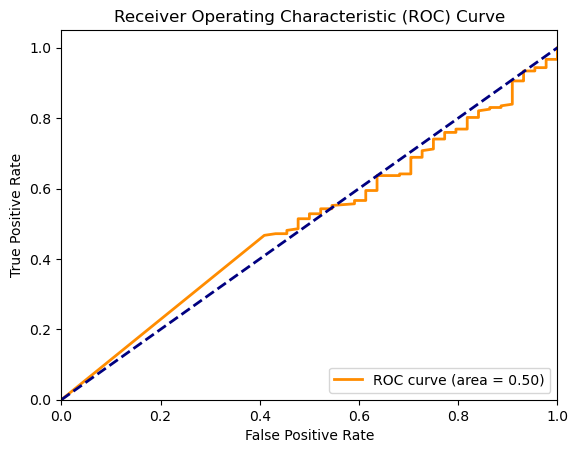

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 341s 5s/step - accuracy: 0.7585 - loss: 0.6718
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 928s 14s/step - accuracy: 0.7947 - loss: 0.4869
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 449s 7s/step - accuracy: 0.8146 - loss: 0.5391
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.8158 - loss: 0.6221
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.8032 - loss: 0.5065
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 358s 5s/step - accuracy: 0.7964 - loss: 0.5032
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1017s 16s/step - accuracy: 0.8148 - loss: 0.4820
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1028s 16s/step - accuracy: 0.8676 - loss: 0.3497
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2820s 44s/step - accuracy: 0.8048 - loss: 0.4978
Epoch 10/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 660s 10s/step - accuracy: 0.8071 - loss: 0.4461
16/16 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step


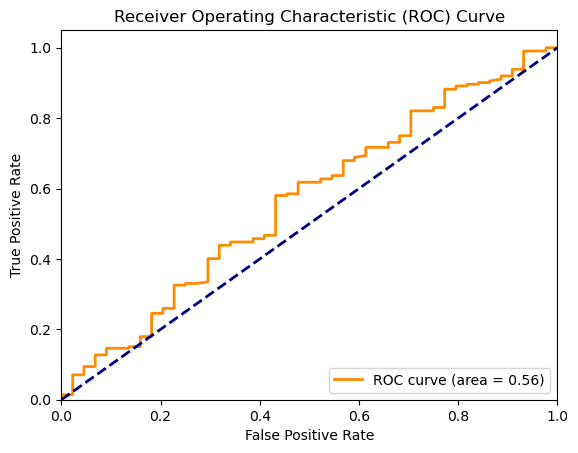

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 840s 12s/step - accuracy: 0.7999 - loss: 0.7144
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 807s 12s/step - accuracy: 0.8091 - loss: 0.6959
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 734s 11s/step - accuracy: 0.8147 - loss: 0.4863
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1089s 17s/step - accuracy: 0.7889 - loss: 0.5170
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1118s 17s/step - accuracy: 0.8056 - loss: 0.5341
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1135s 17s/step - accuracy: 0.8247 - loss: 0.4374
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1037s 16s/step - accuracy: 0.9065 - loss: 0.2763
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1313s 20s/step - accuracy: 0.8671 - loss: 0.4457
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1387s 22s/step - accuracy: 0.8521 - loss: 0.4315
Epoch 10/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1410s 22s/step - accuracy: 0.8274 - loss: 0.4073
16/16 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step


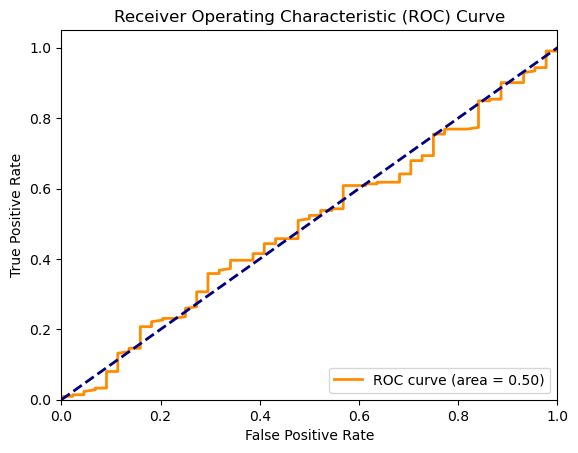

In [10]:
search_space = (1, 10)  ##expected number of layers
best_num_layers = pso(objective_function, n_particles=3, n_iterations=1, search_space=search_space)

In [11]:
print("Best number of layers found by PSO:", best_num_layers)

Best number of layers found by PSO: 8


# ____END OF II-IMAGE BASED TRAINING_

In [14]:
##clear session to clear memory for next model
tf.keras.backend.clear_session()

In [15]:
train_dataset_v6 = tf.keras.preprocessing.image_dataset_from_directory(
    './ptb_resnet_rerun/second_arch/v6/',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=39  ##no weights initialized here by deafult so not used
)

Found 1280 files belonging to 2 classes.
Using 1024 files for training.


In [16]:
val_dataset_v6 = tf.keras.preprocessing.image_dataset_from_directory(
    './ptb_resnet_rerun/second_arch/v6/',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.2,
    subset='validation',
    shuffle=True,
    seed=39  ##no weights initialized here by deafult so not used
)

Found 1280 files belonging to 2 classes.
Using 256 files for validation.


In [17]:
def objective_function(num_layers): ##take the num of layers: optimize the DL architecture
    model_v6 = keras.Sequential() 
    ##TARGET: get the operation of each particle and use it on swarm velocity and position calculationc
    ##default model weights
    custom_model_v6 = ResNet50(include_top=False, weights='imagenet', input_tensor=None, 
                 input_shape=(224, 224, 3), classes=2, classifier_activation="softmax")
    for layer in custom_model_v6.layers:
        layer.trainable=False

    model_v6.add(keras.Input(shape=(224,224,3)))
    model_v6.add(custom_model_v6)
    model_v6.add(layers.Flatten())
    
    for _ in range(num_layers):
        model_v6.add(layers.Dense(1024, activation= 'relu'))
        model_v6.add(layers.Dense(512, activation= 'relu'))
    
    model_v6.add(layers.Dense(2, activation='softmax'))
    model_v6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_v6.fit(train_dataset_v6, epochs=10)  ##change from 20 to 5 epochs 
   
    y_pred_prob = model_v6.predict(val_dataset_v6)
    y_val = np.concatenate([y for x, y in val_dataset_v6], axis=0)
    y_val_2 = y_val.flatten()
    y_pred_prob_2 = y_pred_prob.flatten()
    fpr, tpr, _ = roc_curve(y_val_2[:256], y_pred_prob_2[:256])
    roc_auc = auc(fpr, tpr)
    #f1 = f1_score(y_val, y_pred_prob)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    return -roc_auc  # PSO minimizes, so we negate f1_score, area under curve, accuracy

##set pso 
def pso(objective_function, n_particles, n_iterations, search_space):
    #Initialize swarm randomly per particle
    ##the search space is the number of layers that can be added
    swarm_position = np.random.randint(search_space[0], search_space[1] + 1, size=n_particles)
    swarm_velocity = np.random.uniform(-1, 1, size=n_particles)
    swarm_best_position = swarm_position.copy()
    swarm_best_score = np.zeros(n_particles)

    global_best_position = 0
    global_best_score = float('inf')

    # PSO optimization loop
    for _ in range(n_iterations):
        for j in range(n_particles):
            # Evaluate objective function
            score = objective_function(int(swarm_position[j]))   ##score of training that particle
            # Update swarm best
            if score < swarm_best_score[j]:
                swarm_best_position[j] = swarm_position[j]
                swarm_best_score[j] = score
            # Update global best
            if score < global_best_score:
                global_best_position = swarm_position[j]
                global_best_score = score
        # Update velocities and positions
        inertia_weight = 0.7  # medium inertia weight
        cognitive_weight = 1.5  # cognitive component weight
        social_weight = 1.5  # social component weight
        r1 = np.random.rand()
        r2 = np.random.rand()
        swarm_velocity = (inertia_weight * swarm_velocity +
                          cognitive_weight * r1 * (swarm_best_position - swarm_position) +
                          social_weight * r2 * (global_best_position - swarm_position))
        swarm_position = np.clip(np.round(swarm_position + swarm_velocity), search_space[0], search_space[1])

    return int(global_best_position)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 735s 10s/step - accuracy: 0.7694 - loss: 3.2973
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 288s 4s/step - accuracy: 0.9343 - loss: 0.1675
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.9636 - loss: 0.0966
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 358s 5s/step - accuracy: 0.9720 - loss: 0.1112
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 14488s 230s/step - accuracy: 0.8931 - loss: 0.5349
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 665s 10s/step - accuracy: 0.9756 - loss: 0.0689
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.9902 - loss: 0.0368
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step - accuracy: 0.9874 - loss: 0.0579
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.9902 - loss: 0.0434
Epoch 10/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 316s 5s/step - accuracy: 0.9931 - loss: 0.0281
16/16 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step


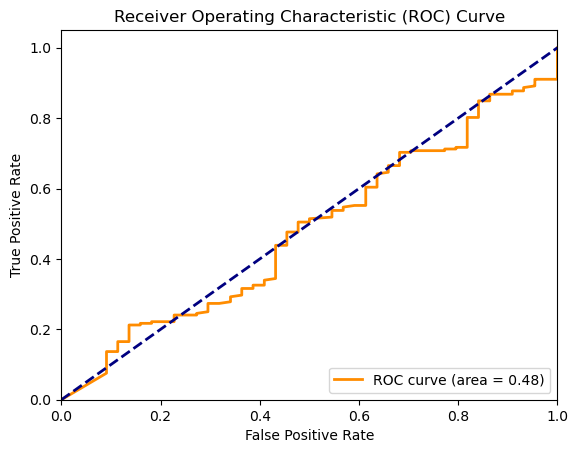

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1240s 18s/step - accuracy: 0.7483 - loss: 10.1112
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 349s 5s/step - accuracy: 0.9345 - loss: 0.3995
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 354s 5s/step - accuracy: 0.9531 - loss: 0.2524
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9577 - loss: 0.2269
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.9653 - loss: 0.1342
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 229s 3s/step - accuracy: 0.9981 - loss: 0.0257
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2098s 33s/step - accuracy: 1.0000 - loss: 2.8816e-05
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 492s 7s/step - accuracy: 1.0000 - loss: 9.5633e-06
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 330s 5s/step - accuracy: 1.0000 - loss: 7.4029e-06
Epoch 10/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 1.0000 - loss: 6.1699e-06
16/16 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step


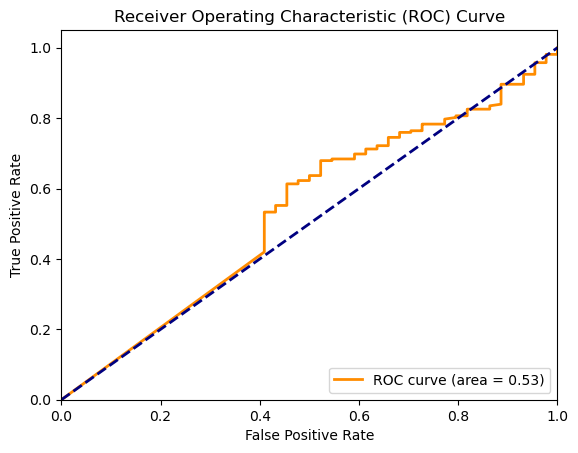

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 558s 8s/step - accuracy: 0.7633 - loss: 0.5945
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4858s 77s/step - accuracy: 0.8379 - loss: 0.3837
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1725s 26s/step - accuracy: 0.8631 - loss: 0.3306
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1286s 20s/step - accuracy: 0.8237 - loss: 0.3671
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1228s 19s/step - accuracy: 0.9540 - loss: 0.1924
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1179s 18s/step - accuracy: 0.9290 - loss: 0.3470
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1197s 18s/step - accuracy: 0.8716 - loss: 0.3980
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4465s 70s/step - accuracy: 0.9481 - loss: 0.1915
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1396s 21s/step - accuracy: 0.9517 - loss: 0.1884
Epoch 10/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1674s 26s/step - accuracy: 0.9298 - loss: 0.2403
16/16 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step


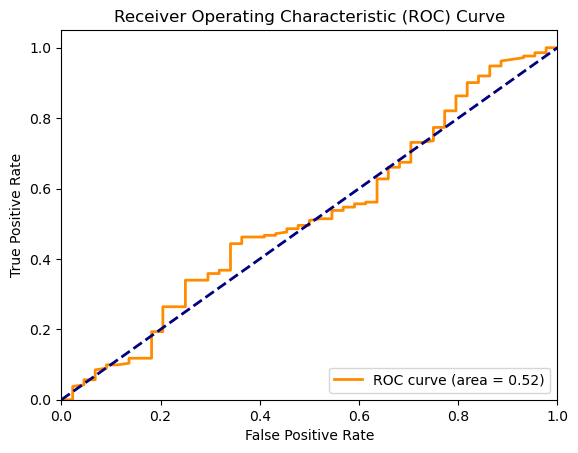

In [18]:
search_space = (1, 10)  ##expected number of layers
best_num_layers = pso(objective_function, n_particles=3, n_iterations=1, search_space=search_space)

In [19]:
print("Best number of layers found by PSO:", best_num_layers)

Best number of layers found by PSO: 1


# ____END OF V6-IMAGE BASED TRAINING_

In [20]:
##clear session to clear memory for next model
tf.keras.backend.clear_session()

In [21]:
train_dataset_vz = tf.keras.preprocessing.image_dataset_from_directory(
    './ptb_resnet_rerun/second_arch/vz/',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=39  ##no weights initialized here by deafult so not used
)

Found 1280 files belonging to 2 classes.
Using 1024 files for training.


In [22]:
val_dataset_vz = tf.keras.preprocessing.image_dataset_from_directory(
    './ptb_resnet_rerun/second_arch/vz/',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.2,
    subset='validation',
    shuffle=True,
    seed=39  ##no weights initialized here by deafult so not used
)

Found 1280 files belonging to 2 classes.
Using 256 files for validation.


In [23]:
def objective_function(num_layers): ##take the num of layers: optimize the DL architecture
    model_vz = keras.Sequential() 
    ##TARGET: get the operation of each particle and use it on swarm velocity and position calculationc
    ##default model weights
    custom_model_vz = ResNet50(include_top=False, weights='imagenet', input_tensor=None, 
                 input_shape=(224, 224, 3), classes=2, classifier_activation="softmax")
    for layer in custom_model_vz.layers:
        layer.trainable=False

    model_vz.add(keras.Input(shape=(224,224,3)))
    model_vz.add(custom_model_vz)
    model_vz.add(layers.Flatten())
    
    for _ in range(num_layers):
        model_vz.add(layers.Dense(1024, activation= 'relu'))
        model_vz.add(layers.Dense(512, activation= 'relu'))
    
    model_vz.add(layers.Dense(2, activation='softmax'))
    model_vz.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_vz.fit(train_dataset_vz, epochs=10)  ##change from 20 to 5 epochs 
   
    y_pred_prob = model_vz.predict(val_dataset_vz)
    y_val = np.concatenate([y for x, y in val_dataset_vz], axis=0)
    y_val_2 = y_val.flatten()
    y_pred_prob_2 = y_pred_prob.flatten()
    fpr, tpr, _ = roc_curve(y_val_2[:256], y_pred_prob_2[:256])
    roc_auc = auc(fpr, tpr)
    #f1 = f1_score(y_val, y_pred_prob)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    return -roc_auc  # PSO minimizes, so we negate f1_score, area under curve, accuracy

##set pso 
def pso(objective_function, n_particles, n_iterations, search_space):
    #Initialize swarm randomly per particle
    ##the search space is the number of layers that can be added
    swarm_position = np.random.randint(search_space[0], search_space[1] + 1, size=n_particles)
    swarm_velocity = np.random.uniform(-1, 1, size=n_particles)
    swarm_best_position = swarm_position.copy()
    swarm_best_score = np.zeros(n_particles)

    global_best_position = 0
    global_best_score = float('inf')

    # PSO optimization loop
    for _ in range(n_iterations):
        for j in range(n_particles):
            # Evaluate objective function
            score = objective_function(int(swarm_position[j]))   ##score of training that particle
            # Update swarm best
            if score < swarm_best_score[j]:
                swarm_best_position[j] = swarm_position[j]
                swarm_best_score[j] = score
            # Update global best
            if score < global_best_score:
                global_best_position = swarm_position[j]
                global_best_score = score
        # Update velocities and positions
        inertia_weight = 0.7  # medium inertia weight
        cognitive_weight = 1.5  # cognitive component weight
        social_weight = 1.5  # social component weight
        r1 = np.random.rand()
        r2 = np.random.rand()
        swarm_velocity = (inertia_weight * swarm_velocity +
                          cognitive_weight * r1 * (swarm_best_position - swarm_position) +
                          social_weight * r2 * (global_best_position - swarm_position))
        swarm_position = np.clip(np.round(swarm_position + swarm_velocity), search_space[0], search_space[1])

    return int(global_best_position)

In [ ]:
search_space = (1, 10)  ##expected number of layers
best_num_layers = pso(objective_function, n_particles=3, n_iterations=1, search_space=search_space)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1350s 20s/step - accuracy: 0.7876 - loss: 1.1970
Epoch 2/10
23/64 ━━━━━━━━━━━━━━━━━━━━ 16:42 24s/step - accuracy: 0.8158 - loss: 0.4209

In [12]:
model_vz = Sequential()

In [13]:
##default model weights
custom_model_vz = ResNet50(include_top=False, weights='imagenet', input_tensor=None, 
                 input_shape=(224, 224, 3), classes=2, classifier_activation="softmax")

for layer in custom_model_vz.layers:
    layer.trainable=False

model_vz.add(keras.Input(shape=(224,224,3)))
model_vz.add(custom_model_vz)
model_vz.add(Flatten())
#model_vz.add(Dense(512, activation='relu'))
model_vz.add(Dense(1024, activation= 'relu'))  ##4096
#model_vz.add(Dense(4096, activation= 'relu'))
model_vz.add(Dense(512, activation= 'relu'))   ##1000
model_vz.add(Dense(2, activation='softmax'))  ##no of classes

In [14]:
model_vz.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │     102,761,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,875,010 (483.99 MB)

 Trainable params: 103,287,298 (394.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [15]:
'''pso_optimizer = ParticleSwarmOptimizer(model.parameters(),
                               inertial_weight=0.5,
                               num_particles=100,
                               max_param_value=1,
                               min_param_value=-1)'''
model_vz.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model_vz.fit(
    train_dataset_vz,
    #val_dataset,
    epochs=10  #20 #instead of 100, since takes too long over same accuracy, no oscillations
)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1146s 17s/step - accuracy: 0.7079 - loss: 19.4792
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 914s 14s/step - accuracy: 0.9231 - loss: 0.2968
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 327s 5s/step - accuracy: 0.9448 - loss: 0.1454
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 323s 5s/step - accuracy: 0.9335 - loss: 0.2808
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 416s 6s/step - accuracy: 0.9961 - loss: 0.0191
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 231s 3s/step - accuracy: 0.9952 - loss: 0.0232
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.9672 - loss: 0.1658
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step - accuracy: 0.9778 - loss: 0.1096
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 15103s 239s/step - accuracy: 0.9981 - loss: 0.0251
Epoch 10/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 441s 7s/step - accuracy: 0.9990 - loss: 0.0044


In [17]:
model_vz.fit(
    val_dataset_vz,
    #val_dataset,
    epochs=10  #20 #instead of 100, since takes too long over same accuracy, no oscillations
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 410s 25s/step - accuracy: 1.0000 - loss: 1.4048e-04
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 546s 33s/step - accuracy: 1.0000 - loss: 5.5708e-05
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 416s 24s/step - accuracy: 1.0000 - loss: 2.9146e-05
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 294s 17s/step - accuracy: 1.0000 - loss: 2.0978e-05
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 204s 12s/step - accuracy: 1.0000 - loss: 1.3672e-05
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 132s 7s/step - accuracy: 1.0000 - loss: 1.2060e-05
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 1.0000 - loss: 1.2735e-05
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 128s 7s/step - accuracy: 1.0000 - loss: 1.3341e-05
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 1.0000 - loss: 1.0859e-05
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 98s 5s/step - accuracy: 1.0000 - loss: 8.3017e-06


In [18]:
model_vz.save('./models/resnet50_vz_images.keras')

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [20]:
y_pred_prob = model_vz.predict(val_dataset_vz)

16/16 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step


In [21]:
y_val = np.concatenate([y for x, y in val_dataset_vz], axis=0)

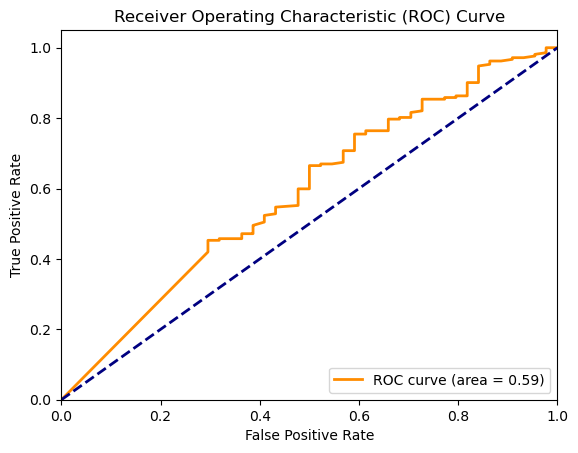

In [22]:
y_val_2 = y_val.flatten()
y_pred_prob_2 = y_pred_prob.flatten()
fpr, tpr, _ = roc_curve(y_val_2[:256], y_pred_prob_2[:256])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [24]:
y_true = np.concatenate([y for _, y in val_dataset_vz], axis=0)

In [25]:
flat_preds = y_pred_prob.flatten()
y_pred_prob_2 = []
for i in range(0,len(flat_preds)):
    y_pred_prob_2.append(int(flat_preds[i]))

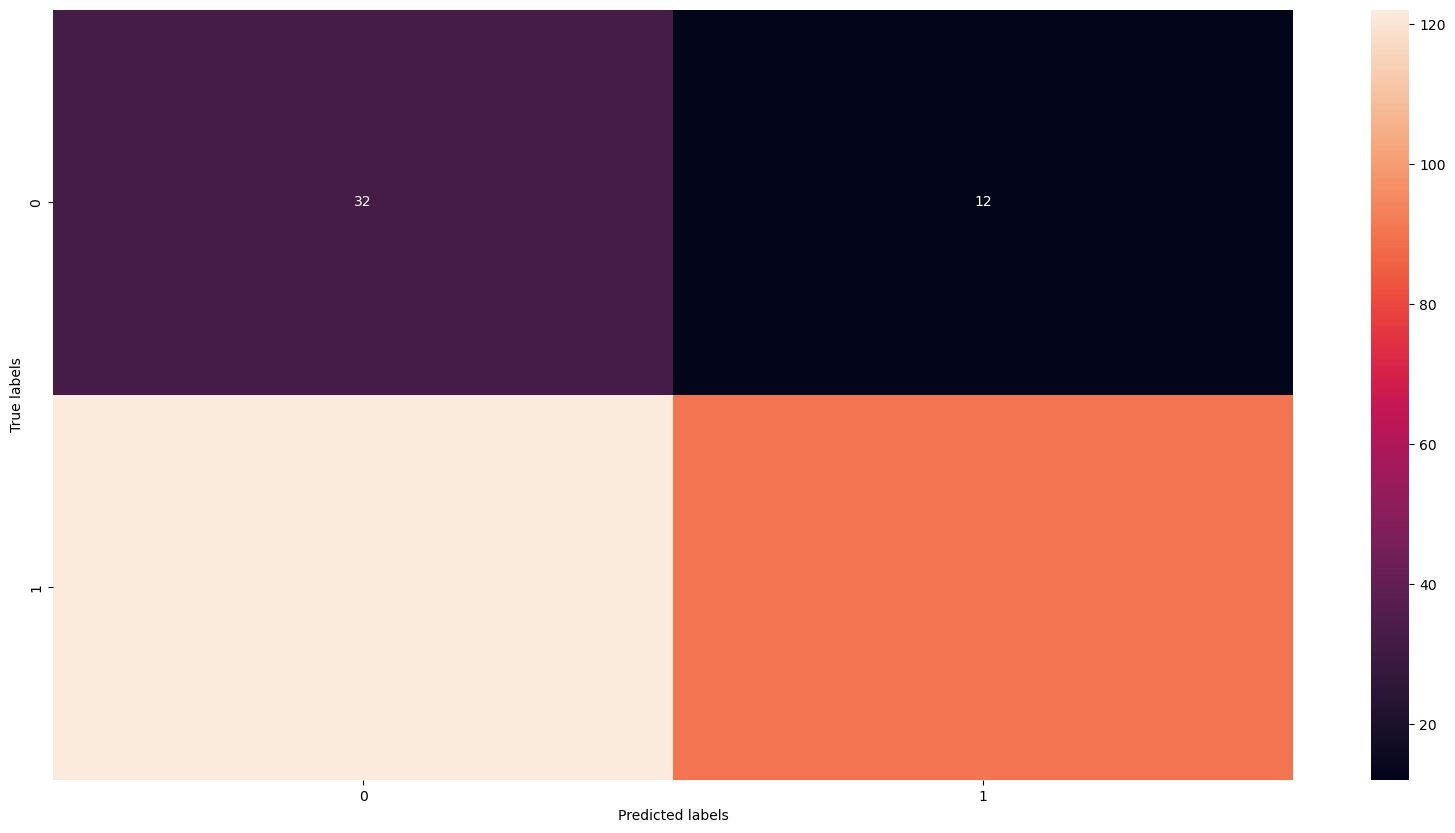

In [26]:
y_pred_prob_new = np.array(y_pred_prob_2)
cm = confusion_matrix(y_true[:256], y_pred_prob_new[:256])
convnet_df_cm = pd.DataFrame(cm)
plt.figure(figsize = (20,10))
sns.heatmap(convnet_df_cm, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [27]:
from sklearn.metrics import classification_report
report = classification_report(y_true[:256], y_pred_prob_new[:256])

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.73      0.32        44
           1       0.88      0.42      0.57       212

    accuracy                           0.48       256
   macro avg       0.55      0.58      0.45       256
weighted avg       0.77      0.48      0.53       256



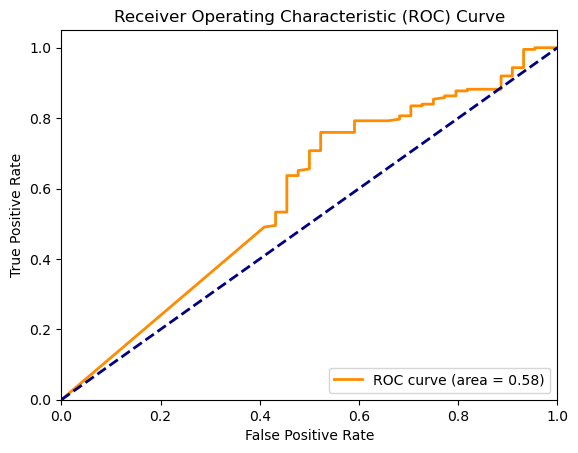

In [73]:
#####VZ CLASSIFIER ON II###SOMETIMES BETTER RESULTS
y_val_2 = y_val.flatten()
y_pred_prob_2 = y_pred_prob.flatten()
fpr, tpr, _ = roc_curve(y_val_2[:256], y_pred_prob_2[:256])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [75]:
y_true = np.concatenate([y for _, y in val_dataset_vz], axis=0)

In [76]:
flat_preds = y_pred_prob.flatten()
y_pred_prob_2 = []
for i in range(0,len(flat_preds)):
    y_pred_prob_2.append(int(flat_preds[i]))

In [77]:
y_pred_prob_new = np.array(y_pred_prob_2)

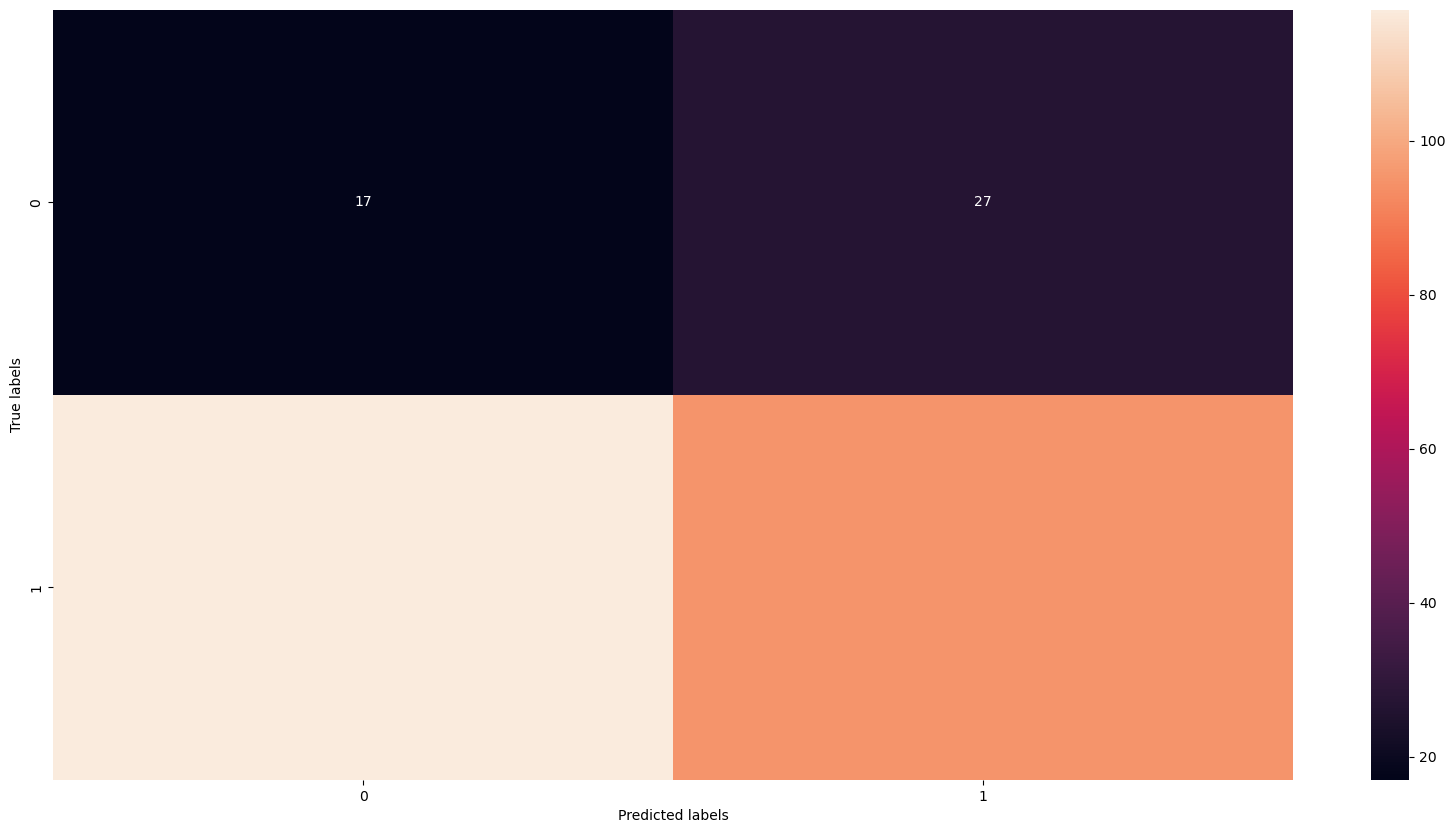

In [78]:
cm = confusion_matrix(y_true[:256], y_pred_prob_new[:256])
convnet_df_cm = pd.DataFrame(cm)
plt.figure(figsize = (20,10))
sns.heatmap(convnet_df_cm, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [79]:
from sklearn.metrics import classification_report
report = classification_report(y_true[:256], y_pred_prob_new[:256])

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.39      0.19        44
           1       0.78      0.45      0.57       212

    accuracy                           0.44       256
   macro avg       0.45      0.42      0.38       256
weighted avg       0.67      0.44      0.50       256



# ____END OF VZ-IMAGE BASED TRAINING_

### _NOTE_: ROC curve shows performance at different classification thresholds, at model_v6, higher ROC with rhythm strip, ii. model_vz has the best ROC for all.

#### Next steps: 
#### 1) Retry with PSO, expected to have a faster model, not necessarily an increase in f1/recall score

#### 2) Generate labels from ii(rhythm strip), v6(anterior segment), vz(feature cardiograph)

#### 3) Labels are either 1 or 0. [0,0,0], [0,0,1], [1,1,0]...etc. To offset high cost of false negative(predicted is -ve MI but true is +ve MI), mark as +ve MI if any of the labels are 1. 

#### 4) Use a classification ML model to divide into 2 different categories. This is done to assess risk, error and bias of ecg diagnosis.  